In [1]:
import requests
import pandas as pd
import geopandas as gpd
import json
from shapely.geometry import Point
import shapely

import matplotlib.pyplot as plt

%matplotlib inline

# Analyzing Aggravated Burglaries in Davidson County

### Part 1 - Data Gathering using APIs

1. A dataset containing details about Metro Nashville Police Department reported incidents is available at https://data.nashville.gov/Police/Metro-Nashville-Police-Department-Incidents/2u6v-ujjs. Make use of the API to find all aggravated burglary incidents () that were reported during the nine month period from January 1, 2022 through September 30, 2021. (**Hint:** Check out the [API Docs](https://dev.socrata.com/foundry/data.nashville.gov/2u6v-ujjs) to see how to narrow down the response to just the desired results).

2. Using the [2020 American Community Survey API](https://www.census.gov/data/developers/data-sets/acs-5year.html), obtain, for each census tract, the population (B01001_001E in the detailed tables) and the median income (S1901_C01_012E in the subject tables). Hint: Tennessee's FIPS code is 47 and Davidson County's FIPS code is 37. 

In [2]:
endpoint = 'https://data.nashville.gov/resource/2u6v-ujjs.json'

params = {
    '$where' : "incident_reported between '2022-01-01T00:00:00' and '2022-09-30T23:59:59'",
    'offense_nibrs' : '220',
    '$limit' : 5000
}

response = requests.get(endpoint, params = params)

response.json()

[{'primary_key': '20220167824_11',
  'incident_number': '20220167824',
  'report_type': 'D',
  'report_type_description': 'DISPATCHED',
  'incident_status_code': 'O',
  'incident_status_description': 'OPEN',
  'investigation_status': 'Open',
  'incident_occurred': '2022-04-07T15:00:00.000',
  'incident_reported': '2022-04-08T11:52:00.000',
  'incident_location': 'JACKSON ST',
  'latitude': '36.17',
  'longitude': '-86.8',
  'location_code': '22',
  'location_description': 'RESIDENCE, HOME',
  'offense_number': '1',
  'offense_nibrs': '220',
  'offense_description': 'BURGLARY- AGGRAVATED',
  'weapon_primary': '16',
  'weapon_description': 'Unarmed',
  'victim_number': '1',
  'domestic_related': False,
  'victim_type': 'I',
  'victim_description': 'INDIVIDUAL (18 AND OVER)',
  'victim_gender': 'U',
  'victim_race': 'W',
  'victim_ethnicity': 'Non-Hispanic',
  'victim_county_resident': 'NON RESIDENT',
  'mapped_location': {'type': 'Point', 'coordinates': [-86.8, 36.17]}},
 {'primary_key':

In [3]:
nash_burglary = pd.DataFrame(response.json())
nash_burglary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3530 entries, 0 to 3529
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   primary_key                  3530 non-null   object
 1   incident_number              3530 non-null   object
 2   report_type                  3530 non-null   object
 3   report_type_description      3481 non-null   object
 4   incident_status_code         3530 non-null   object
 5   incident_status_description  3530 non-null   object
 6   investigation_status         3530 non-null   object
 7   incident_occurred            3530 non-null   object
 8   incident_reported            3530 non-null   object
 9   incident_location            3510 non-null   object
 10  latitude                     3512 non-null   object
 11  longitude                    3512 non-null   object
 12  location_code                3530 non-null   object
 13  location_description         3530

In [4]:
nash_aggr_burglary = (
    nash_burglary
    .loc[nash_burglary['offense_description']
         .str.upper()
         .str.contains('AGGRAVATED')]
)
nash_aggr_burglary

,primary_key,incident_number,report_type,report_type_description,incident_status_code,incident_status_description,investigation_status,incident_occurred,incident_reported,incident_location,...,victim_type,victim_description,victim_gender,victim_race,victim_ethnicity,victim_county_resident,mapped_location,rpa,zone,zip_code
0,20220167824_11,20220167824,D,DISPATCHED,O,OPEN,Open,2022-04-07T15:00:00.000,2022-04-08T11:52:00.000,JACKSON ST,...,I,INDIVIDUAL (18 AND OVER),U,W,Non-Hispanic,NON RESIDENT,"{'type': 'Point', 'coordinates': [-86.8, 36.17]}",NaN,NaN,NaN
1,20220126184_31,20220126184,D,DISPATCHED,O,OPEN,Open,2022-03-18T02:30:00.000,2022-03-18T06:51:00.000,BENTON AVE,...,I,INDIVIDUAL (18 AND OVER),M,W,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.77, 36.13]}",8029,817,NaN
2,20220027854_12,20220027854,D,DISPATCHED,O,OPEN,Open,2022-01-18T07:45:00.000,2022-01-19T23:48:00.000,CANE RIDGE RD,...,I,INDIVIDUAL (18 AND OVER),M,B,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.66, 36.04]}",NaN,NaN,NaN
3,20220032825_11,20220032825,D,DISPATCHED,O,OPEN,Open,2022-01-23T00:40:00.000,2022-01-24T06:57:00.000,BROOKWOOD TER,...,I,INDIVIDUAL (18 AND OVER),F,W,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.86, 36.13]}",5019,121,NaN
5,20220010799_11,20220010799,D,DISPATCHED,O,OPEN,Open,2021-12-06T12:00:00.000,2022-01-21T16:25:00.000,SOUTH ST,...,I,INDIVIDUAL (18 AND OVER),M,W,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.78, 36.15]}",6805,815,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3522,20220417748_11,20220417748,D,DISPATCHED,O,OPEN,Open,2022-08-22T05:40:00.000,2022-08-22T21:24:00.000,PENN MEADE WAY,...,I,INDIVIDUAL (18 AND OVER),F,U,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.7, 36.24]}",NaN,NaN,NaN
3523,20220462314_11,20220462314,D,DISPATCHED,R,REFUSED TO COOPERATE,Closed,2022-09-13T17:00:00.000,2022-09-15T02:04:00.000,1524 1524,...,I,INDIVIDUAL (18 AND OVER),M,W,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.744, 36....",NaN,NaN,37206
3524,20220397543_11,20220397543,D,DISPATCHED,R,REFUSED TO COOPERATE,Closed,2022-08-11T18:00:00.000,2022-08-11T22:47:00.000,930 930,...,I,INDIVIDUAL (18 AND OVER),F,B,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.835, 36....",NaN,NaN,37209
3526,20220487005_11,20220487005,D,DISPATCHED,R,REFUSED TO COOPERATE,Closed,2022-09-27T19:16:00.000,2022-09-27T22:46:00.000,400 400,...,I,INDIVIDUAL (18 AND OVER),F,B,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.794, 36....",NaN,NaN,37207


In [5]:
with open('../gov_api_key.json') as fi:
    credentials = json.load(fi)
    
api_key = credentials['gov_api']

In [6]:
pop_endpoint = f'https://api.census.gov/data/2020/acs/acs5?get=NAME,B01001_001E&for=tract:*&in=state:47&in=county:037&key={api_key}'

pop_response = requests.get(pop_endpoint)

pop_response

<Response [200]>

In [7]:
pop_df = pd.DataFrame(pop_response.json())
#The first row actually contains the column headers, so making that adjustment
pop_df = pop_df.rename(columns=pop_df.iloc[0]).drop(pop_df.index[0])
#renaming to be a bit more user friendly
pop_df = pop_df.rename(columns = {'NAME' : 'tract_name',
                                  'B01001_001E' : 'population'})
pop_df

,tract_name,population,state,county,tract
1,"Census Tract 190.04, Davidson County, Tennessee",4470,47,037,019004
2,"Census Tract 190.07, Davidson County, Tennessee",2904,47,037,019007
3,"Census Tract 190.08, Davidson County, Tennessee",6005,47,037,019008
4,"Census Tract 191.05, Davidson County, Tennessee",5707,47,037,019105
5,"Census Tract 191.06, Davidson County, Tennessee",4336,47,037,019106
...,...,...,...,...,...
170,"Census Tract 189.01, Davidson County, Tennessee",3280,47,037,018901
171,"Census Tract 189.02, Davidson County, Tennessee",2704,47,037,018902
172,"Census Tract 189.04, Davidson County, Tennessee",3410,47,037,018904
173,"Census Tract 189.05, Davidson County, Tennessee",3292,47,037,018905


In [8]:
inc_endpoint = f'https://api.census.gov/data/2020/acs/acs5/subject?get=NAME,S1901_C01_012E&for=tract:*&in=state:47&in=county:037&key={api_key}'

inc_response = requests.get(inc_endpoint)

inc_response

<Response [200]>

In [9]:
inc_df = pd.DataFrame(inc_response.json())
inc_df = inc_df.rename(columns=inc_df.iloc[0]).drop(inc_df.index[0])
inc_df = inc_df.rename(columns = {'NAME' : 'tract_name',
                                  'S1901_C01_012E' : 'median_income'})
inc_df

,tract_name,median_income,state,county,tract
1,"Census Tract 190.04, Davidson County, Tennessee",44001,47,037,019004
2,"Census Tract 190.07, Davidson County, Tennessee",48485,47,037,019007
3,"Census Tract 190.08, Davidson County, Tennessee",50512,47,037,019008
4,"Census Tract 191.05, Davidson County, Tennessee",48271,47,037,019105
5,"Census Tract 191.06, Davidson County, Tennessee",65323,47,037,019106
...,...,...,...,...,...
170,"Census Tract 189.01, Davidson County, Tennessee",47500,47,037,018901
171,"Census Tract 189.02, Davidson County, Tennessee",75286,47,037,018902
172,"Census Tract 189.04, Davidson County, Tennessee",61750,47,037,018904
173,"Census Tract 189.05, Davidson County, Tennessee",65960,47,037,018905


### Part 2 - Spatial Joining and Data Merging

3. Download the 2020 census tract shapefiles for Tennessee from https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2020.html. (The FIPS code for Tennessee is 47). Perform a spatial join to determine the census tract in which each burglary incident occurred. 

In [10]:
shape = gpd.read_file('../data/tl_2020_47_tract.shp')
shape

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,47,175,925200,47175925200,9252,Census Tract 9252,G5020,S,227429512,1667739,+35.7438100,-085.4940227,"POLYGON ((-85.61516 35.76106, -85.61509 35.761..."
1,47,175,925000,47175925000,9250,Census Tract 9250,G5020,S,480712883,1225717,+35.6695378,-085.4220628,"POLYGON ((-85.60513 35.70854, -85.60511 35.708..."
2,47,003,950201,47003950201,9502.01,Census Tract 9502.01,G5020,S,121774227,0,+35.6517480,-086.5575518,"POLYGON ((-86.64406 35.64029, -86.64375 35.642..."
3,47,003,950202,47003950202,9502.02,Census Tract 9502.02,G5020,S,110617191,700793,+35.5845755,-086.5790796,"POLYGON ((-86.66377 35.58189, -86.66367 35.582..."
4,47,093,003300,47093003300,33,Census Tract 33,G5020,S,5860088,229299,+36.0020586,-083.8371218,"POLYGON ((-83.86208 35.99255, -83.86207 35.992..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,47,073,050501,47073050501,505.01,Census Tract 505.01,G5020,S,83355996,0,+36.5659159,-082.7715246,"POLYGON ((-82.85011 36.54107, -82.84955 36.541..."
1697,47,073,050601,47073050601,506.01,Census Tract 506.01,G5020,S,23847669,177932,+36.5836443,-082.6318663,"POLYGON ((-82.68939 36.58793, -82.68936 36.588..."
1698,47,073,050602,47073050602,506.02,Census Tract 506.02,G5020,S,23386546,668716,+36.5467218,-082.6458382,"POLYGON ((-82.69446 36.54856, -82.69445 36.548..."
1699,47,073,050502,47073050502,505.02,Census Tract 505.02,G5020,S,32873931,311980,+36.5332207,-082.7586081,"POLYGON ((-82.82242 36.52006, -82.82171 36.520..."


In [11]:
shape.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1701 entries, 0 to 1700
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   STATEFP   1701 non-null   object  
 1   COUNTYFP  1701 non-null   object  
 2   TRACTCE   1701 non-null   object  
 3   GEOID     1701 non-null   object  
 4   NAME      1701 non-null   object  
 5   NAMELSAD  1701 non-null   object  
 6   MTFCC     1701 non-null   object  
 7   FUNCSTAT  1701 non-null   object  
 8   ALAND     1701 non-null   int64   
 9   AWATER    1701 non-null   int64   
 10  INTPTLAT  1701 non-null   object  
 11  INTPTLON  1701 non-null   object  
 12  geometry  1701 non-null   geometry
dtypes: geometry(1), int64(2), object(10)
memory usage: 172.9+ KB


4. Aggregate the data by census tract. **Warning:** each incident can appear multiple times if there are multiple victims, so be sure that you aren't double-counting any incidents. Which census tract had the highest number of burglaries? Which census tract had the highest number of burglaries per 1000 residents? **Note:** Make sure that you keep all census tracts, not just those that have had a burglary.

In [12]:
nash_aggr_burglary['geometry'] = gpd.points_from_xy(nash_aggr_burglary['longitude'], nash_aggr_burglary['latitude'])

nash_aggr_burglary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1719 entries, 0 to 3528
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   primary_key                  1719 non-null   object  
 1   incident_number              1719 non-null   object  
 2   report_type                  1719 non-null   object  
 3   report_type_description      1708 non-null   object  
 4   incident_status_code         1719 non-null   object  
 5   incident_status_description  1719 non-null   object  
 6   investigation_status         1719 non-null   object  
 7   incident_occurred            1719 non-null   object  
 8   incident_reported            1719 non-null   object  
 9   incident_location            1708 non-null   object  
 10  latitude                     1710 non-null   object  
 11  longitude                    1710 non-null   object  
 12  location_code                1719 non-null   object  
 13  loc

C:\Users\mews2\AppData\Local\Temp\ipykernel_10176\3746426518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nash_aggr_burglary['geometry'] = gpd.points_from_xy(nash_aggr_burglary['longitude'], nash_aggr_burglary['latitude'])


In [13]:
burglary_geo = gpd.GeoDataFrame(nash_aggr_burglary, 
                           crs = shape.crs, 
                           geometry = nash_aggr_burglary['geometry'])
burglary_geo

,primary_key,incident_number,report_type,report_type_description,incident_status_code,incident_status_description,investigation_status,incident_occurred,incident_reported,incident_location,...,victim_description,victim_gender,victim_race,victim_ethnicity,victim_county_resident,mapped_location,rpa,zone,zip_code,geometry
0,20220167824_11,20220167824,D,DISPATCHED,O,OPEN,Open,2022-04-07T15:00:00.000,2022-04-08T11:52:00.000,JACKSON ST,...,INDIVIDUAL (18 AND OVER),U,W,Non-Hispanic,NON RESIDENT,"{'type': 'Point', 'coordinates': [-86.8, 36.17]}",NaN,NaN,NaN,POINT (-86.80000 36.17000)
1,20220126184_31,20220126184,D,DISPATCHED,O,OPEN,Open,2022-03-18T02:30:00.000,2022-03-18T06:51:00.000,BENTON AVE,...,INDIVIDUAL (18 AND OVER),M,W,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.77, 36.13]}",8029,817,NaN,POINT (-86.77000 36.13000)
2,20220027854_12,20220027854,D,DISPATCHED,O,OPEN,Open,2022-01-18T07:45:00.000,2022-01-19T23:48:00.000,CANE RIDGE RD,...,INDIVIDUAL (18 AND OVER),M,B,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.66, 36.04]}",NaN,NaN,NaN,POINT (-86.66000 36.04000)
3,20220032825_11,20220032825,D,DISPATCHED,O,OPEN,Open,2022-01-23T00:40:00.000,2022-01-24T06:57:00.000,BROOKWOOD TER,...,INDIVIDUAL (18 AND OVER),F,W,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.86, 36.13]}",5019,121,NaN,POINT (-86.86000 36.13000)
5,20220010799_11,20220010799,D,DISPATCHED,O,OPEN,Open,2021-12-06T12:00:00.000,2022-01-21T16:25:00.000,SOUTH ST,...,INDIVIDUAL (18 AND OVER),M,W,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.78, 36.15]}",6805,815,NaN,POINT (-86.78000 36.15000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3522,20220417748_11,20220417748,D,DISPATCHED,O,OPEN,Open,2022-08-22T05:40:00.000,2022-08-22T21:24:00.000,PENN MEADE WAY,...,INDIVIDUAL (18 AND OVER),F,U,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.7, 36.24]}",NaN,NaN,NaN,POINT (-86.70000 36.24000)
3523,20220462314_11,20220462314,D,DISPATCHED,R,REFUSED TO COOPERATE,Closed,2022-09-13T17:00:00.000,2022-09-15T02:04:00.000,1524 1524,...,INDIVIDUAL (18 AND OVER),M,W,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.744, 36....",NaN,NaN,37206,POINT (-86.74400 36.19400)
3524,20220397543_11,20220397543,D,DISPATCHED,R,REFUSED TO COOPERATE,Closed,2022-08-11T18:00:00.000,2022-08-11T22:47:00.000,930 930,...,INDIVIDUAL (18 AND OVER),F,B,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.835, 36....",NaN,NaN,37209,POINT (-86.83500 36.16000)
3526,20220487005_11,20220487005,D,DISPATCHED,R,REFUSED TO COOPERATE,Closed,2022-09-27T19:16:00.000,2022-09-27T22:46:00.000,400 400,...,INDIVIDUAL (18 AND OVER),F,B,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.794, 36....",NaN,NaN,37207,POINT (-86.79400 36.21400)


In [14]:
burglary_geo.loc[burglary_geo['incident_number'].duplicated()]

,primary_key,incident_number,report_type,report_type_description,incident_status_code,incident_status_description,investigation_status,incident_occurred,incident_reported,incident_location,...,victim_description,victim_gender,victim_race,victim_ethnicity,victim_county_resident,mapped_location,rpa,zone,zip_code,geometry
11,20220027854_11,20220027854,D,DISPATCHED,O,OPEN,Open,2022-01-18T07:45:00.000,2022-01-19T23:48:00.000,CANE RIDGE RD,...,INDIVIDUAL (18 AND OVER),F,W,Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.66, 36.04]}",NaN,NaN,NaN,POINT (-86.66000 36.04000)
32,20220031505_11,20220031505,D,DISPATCHED,A,CLEARED BY ARREST,Closed,2021-01-22T03:40:00.000,2022-01-22T06:22:00.000,2001 2001,...,INDIVIDUAL (18 AND OVER),F,B,Non-Hispanic,UNKNOWN,"{'type': 'Point', 'coordinates': [-86.679, 36....",1721,727,37115,POINT (-86.67900 36.30300)
33,20220032791_12,20220032791,D,DISPATCHED,O,OPEN,Open,2022-01-23T03:30:00.000,2022-01-23T05:30:00.000,NOLENSVILLE PIKE,...,INDIVIDUAL (18 AND OVER),M,W,Hispanic,NON RESIDENT,"{'type': 'Point', 'coordinates': [-86.72, 36.07]}",NaN,NaN,NaN,POINT (-86.72000 36.07000)
35,20220031505_13,20220031505,D,DISPATCHED,A,CLEARED BY ARREST,Closed,2021-01-22T03:40:00.000,2022-01-22T06:22:00.000,2001 2001,...,INDIVIDUAL (18 AND OVER),F,B,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.679, 36....",1721,727,37115,POINT (-86.67900 36.30300)
36,20220033804_12,20220033804,D,DISPATCHED,O,OPEN,Open,2022-01-24T00:00:00.000,2022-01-24T01:57:00.000,WILLOW CREEK CT,...,INDIVIDUAL (18 AND OVER),M,B,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.78, 36.25]}",2045,721,NaN,POINT (-86.78000 36.25000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3509,20220453940_13,20220453940,D,DISPATCHED,J,"JUVENILE, NO CUSTODY",Closed,2022-09-04T16:18:00.000,2022-09-10T17:33:00.000,601 601,...,INDIVIDUAL (18 AND OVER),F,W,Non-Hispanic,NON RESIDENT,"{'type': 'Point', 'coordinates': [-86.882, 36....",NaN,NaN,37205,POINT (-86.88200 36.11100)
3510,20220453940_11,20220453940,D,DISPATCHED,J,"JUVENILE, NO CUSTODY",Closed,2022-09-04T16:18:00.000,2022-09-10T17:33:00.000,601 601,...,INDIVIDUAL (18 AND OVER),M,W,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.882, 36....",NaN,NaN,37205,POINT (-86.88200 36.11100)
3518,20220375527_15,20220375527,D,DISPATCHED,A,CLEARED BY ARREST,Closed,2022-07-31T00:00:00.000,2022-07-31T01:46:00.000,104 104,...,INDIVIDUAL (18 AND OVER),F,W,Non-Hispanic,NON RESIDENT,"{'type': 'Point', 'coordinates': [-86.772, 36....",NaN,NaN,37207,POINT (-86.77200 36.19600)
3520,20220375527_11,20220375527,D,DISPATCHED,A,CLEARED BY ARREST,Closed,2022-07-31T00:00:00.000,2022-07-31T01:46:00.000,104 104,...,INDIVIDUAL (18 AND OVER),M,W,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.772, 36....",NaN,NaN,37207,POINT (-86.77200 36.19600)


In [15]:
burglary_geo = burglary_geo.drop_duplicates(subset=['incident_number'])

burglary_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1265 entries, 0 to 3528
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   primary_key                  1265 non-null   object  
 1   incident_number              1265 non-null   object  
 2   report_type                  1265 non-null   object  
 3   report_type_description      1254 non-null   object  
 4   incident_status_code         1265 non-null   object  
 5   incident_status_description  1265 non-null   object  
 6   investigation_status         1265 non-null   object  
 7   incident_occurred            1265 non-null   object  
 8   incident_reported            1265 non-null   object  
 9   incident_location            1255 non-null   object  
 10  latitude                     1257 non-null   object  
 11  longitude                    1257 non-null   object  
 12  location_code                1265 non-null   object  


In [16]:
burglary_by_tract = gpd.sjoin(burglary_geo, shape, how='right', predicate = 'within')
burglary_by_tract

,index_left,primary_key,incident_number,report_type,report_type_description,incident_status_code,incident_status_description,investigation_status,incident_occurred,incident_reported,...,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,47175925200,9252,Census Tract 9252,G5020,S,227429512,1667739,+35.7438100,-085.4940227,"POLYGON ((-85.61516 35.76106, -85.61509 35.761..."
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,47175925000,9250,Census Tract 9250,G5020,S,480712883,1225717,+35.6695378,-085.4220628,"POLYGON ((-85.60513 35.70854, -85.60511 35.708..."
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,47003950201,9502.01,Census Tract 9502.01,G5020,S,121774227,0,+35.6517480,-086.5575518,"POLYGON ((-86.64406 35.64029, -86.64375 35.642..."
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,47003950202,9502.02,Census Tract 9502.02,G5020,S,110617191,700793,+35.5845755,-086.5790796,"POLYGON ((-86.66377 35.58189, -86.66367 35.582..."
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,47093003300,33,Census Tract 33,G5020,S,5860088,229299,+36.0020586,-083.8371218,"POLYGON ((-83.86208 35.99255, -83.86207 35.992..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,47073050501,505.01,Census Tract 505.01,G5020,S,83355996,0,+36.5659159,-082.7715246,"POLYGON ((-82.85011 36.54107, -82.84955 36.541..."
1697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,47073050601,506.01,Census Tract 506.01,G5020,S,23847669,177932,+36.5836443,-082.6318663,"POLYGON ((-82.68939 36.58793, -82.68936 36.588..."
1698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,47073050602,506.02,Census Tract 506.02,G5020,S,23386546,668716,+36.5467218,-082.6458382,"POLYGON ((-82.69446 36.54856, -82.69445 36.548..."
1699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,47073050502,505.02,Census Tract 505.02,G5020,S,32873931,311980,+36.5332207,-082.7586081,"POLYGON ((-82.82242 36.52006, -82.82171 36.520..."


In [17]:
burglary_by_tract.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2793 entries, 0 to 1700
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   index_left                   1257 non-null   float64 
 1   primary_key                  1257 non-null   object  
 2   incident_number              1257 non-null   object  
 3   report_type                  1257 non-null   object  
 4   report_type_description      1246 non-null   object  
 5   incident_status_code         1257 non-null   object  
 6   incident_status_description  1257 non-null   object  
 7   investigation_status         1257 non-null   object  
 8   incident_occurred            1257 non-null   object  
 9   incident_reported            1257 non-null   object  
 10  incident_location            1250 non-null   object  
 11  latitude                     1257 non-null   object  
 12  longitude                    1257 non-null   object  


In [18]:
burglary_by_tract.loc[~burglary_by_tract['incident_number'].isna()]

,index_left,primary_key,incident_number,report_type,report_type_description,incident_status_code,incident_status_description,investigation_status,incident_occurred,incident_reported,...,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
10,2949.0,20220146403_11,20220146403,D,DISPATCHED,O,OPEN,Open,2022-03-26T08:00:00.000,2022-03-28T19:56:00.000,...,47037019004,190.04,Census Tract 190.04,G5020,S,2904633,0,+36.0699448,-086.7140690,"POLYGON ((-86.72632 36.07961, -86.72612 36.079..."
10,2043.0,20220338018_11,20220338018,D,DISPATCHED,O,OPEN,Open,2022-07-02T07:00:00.000,2022-07-10T10:46:00.000,...,47037019004,190.04,Census Tract 190.04,G5020,S,2904633,0,+36.0699448,-086.7140690,"POLYGON ((-86.72632 36.07961, -86.72612 36.079..."
10,3364.0,20220468284_11,20220468284,D,DISPATCHED,O,OPEN,Open,2022-09-18T12:12:00.000,2022-09-18T12:12:00.000,...,47037019004,190.04,Census Tract 190.04,G5020,S,2904633,0,+36.0699448,-086.7140690,"POLYGON ((-86.72632 36.07961, -86.72612 36.079..."
10,479.0,20220182311_11,20220182311,D,DISPATCHED,O,OPEN,Open,2022-04-15T17:40:00.000,2022-04-15T19:03:00.000,...,47037019004,190.04,Census Tract 190.04,G5020,S,2904633,0,+36.0699448,-086.7140690,"POLYGON ((-86.72632 36.07961, -86.72612 36.079..."
10,2424.0,20220013789_11,20220013789,D,DISPATCHED,A,CLEARED BY ARREST,Closed,2022-01-10T19:57:00.000,2022-01-10T22:56:00.000,...,47037019004,190.04,Census Tract 190.04,G5020,S,2904633,0,+36.0699448,-086.7140690,"POLYGON ((-86.72632 36.07961, -86.72612 36.079..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1693,899.0,20220203180_11,20220203180,D,DISPATCHED,O,OPEN,Open,2022-04-26T13:30:00.000,2022-04-26T19:51:00.000,...,47037013400,134,Census Tract 134,G5020,S,3620752,0,+36.1446942,-086.8426732,"POLYGON ((-86.85569 36.14944, -86.85530 36.149..."
1693,2940.0,20220141387_11,20220141387,D,DISPATCHED,O,OPEN,Open,2022-03-25T13:00:00.000,2022-03-26T01:00:00.000,...,47037013400,134,Census Tract 134,G5020,S,3620752,0,+36.1446942,-086.8426732,"POLYGON ((-86.85569 36.14944, -86.85530 36.149..."
1693,1386.0,20220212679_11,20220212679,D,DISPATCHED,O,OPEN,Open,2022-05-01T18:30:00.000,2022-05-01T20:33:00.000,...,47037013400,134,Census Tract 134,G5020,S,3620752,0,+36.1446942,-086.8426732,"POLYGON ((-86.85569 36.14944, -86.85530 36.149..."
1693,1534.0,20220350836_11,20220350836,D,DISPATCHED,O,OPEN,Open,2022-07-12T12:00:00.000,2022-07-17T15:40:00.000,...,47037013400,134,Census Tract 134,G5020,S,3620752,0,+36.1446942,-086.8426732,"POLYGON ((-86.85569 36.14944, -86.85530 36.149..."


In [19]:
burglary_by_tract.groupby(['NAMELSAD'])['incident_number'].count().sort_values(ascending=False).head(50)

NAMELSAD
Census Tract 143       41
Census Tract 163       37
Census Tract 160       30
Census Tract 142       27
Census Tract 190.03    22
Census Tract 126       21
Census Tract 113       21
Census Tract 127.01    20
Census Tract 190.04    20
Census Tract 114       19
Census Tract 156.25    19
Census Tract 169       19
Census Tract 162       18
Census Tract 158.06    17
Census Tract 118       16
Census Tract 156.29    16
Census Tract 156.37    16
Census Tract 110.01    16
Census Tract 137.02    15
Census Tract 144       15
Census Tract 158.04    15
Census Tract 193       15
Census Tract 138       14
Census Tract 153       13
Census Tract 159       13
Census Tract 161       13
Census Tract 156.34    13
Census Tract 104.04    12
Census Tract 107.01    12
Census Tract 189.04    12
Census Tract 109.03    12
Census Tract 108.02    12
Census Tract 183.03    11
Census Tract 195.02    11
Census Tract 170       11
Census Tract 136       11
Census Tract 112       10
Census Tract 107.02    10
Cen

Census Tract 143 has the most with 41 incidents of aggravated burglary

5. Merge in the census data that you gathered in question 2. Remove any rows that have zero population or negative median income values.

In [20]:
full_df = pd.merge(burglary_by_tract, pop_df, how='inner', left_on='TRACTCE', right_on='tract')
full_df = pd.merge(full_df, inc_df, how='inner', on=['tract', 'county', 'state', 'tract_name'])
full_df = full_df.drop(columns = ['index_left', 'STATEFP', 'COUNTYFP', 'TRACTCE'])
full_df[['population', 'median_income']] = full_df[['population', 'median_income']].astype(float)
full_df = full_df.loc[full_df['population'] != 0]
full_df = full_df.loc[full_df['median_income'] >= 0].reset_index(drop=True)
full_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 47 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   primary_key                  1256 non-null   object  
 1   incident_number              1256 non-null   object  
 2   report_type                  1256 non-null   object  
 3   report_type_description      1245 non-null   object  
 4   incident_status_code         1256 non-null   object  
 5   incident_status_description  1256 non-null   object  
 6   investigation_status         1256 non-null   object  
 7   incident_occurred            1256 non-null   object  
 8   incident_reported            1256 non-null   object  
 9   incident_location            1249 non-null   object  
 10  latitude                     1256 non-null   object  
 11  longitude                    1256 non-null   object  
 12  location_code                1256 non-null   object  


In [21]:
full_df.sort_values('median_income')

,primary_key,incident_number,report_type,report_type_description,incident_status_code,incident_status_description,investigation_status,incident_occurred,incident_reported,incident_location,...,AWATER,INTPTLAT,INTPTLON,geometry,tract_name,population,state,county,tract,median_income
629,20220093348_11,20220093348,D,DISPATCHED,R,REFUSED TO COOPERATE,Closed,2022-02-27T03:00:00.000,2022-03-01T10:52:00.000,130 130,...,0,+36.1516127,-086.7645179,"POLYGON ((-86.76948 36.15122, -86.76854 36.151...","Census Tract 148, Davidson County, Tennessee",1454.0,47,037,014800,13750.0
628,20220070064_11,20220070064,D,DISPATCHED,R,REFUSED TO COOPERATE,Closed,2022-02-14T08:00:00.000,2022-02-15T08:38:00.000,28 28,...,0,+36.1516127,-086.7645179,"POLYGON ((-86.76948 36.15122, -86.76854 36.151...","Census Tract 148, Davidson County, Tennessee",1454.0,47,037,014800,13750.0
627,20220028509_11,20220028509,D,DISPATCHED,U,UNFOUNDED,Closed,2022-01-19T07:30:00.000,2022-01-20T09:57:00.000,920 920,...,0,+36.1516127,-086.7645179,"POLYGON ((-86.76948 36.15122, -86.76854 36.151...","Census Tract 148, Davidson County, Tennessee",1454.0,47,037,014800,13750.0
78,20220324822_11,20220324822,D,DISPATCHED,O,OPEN,Open,2022-07-02T19:00:00.000,2022-07-03T12:46:00.000,LESTER AVE,...,0,+36.1360881,-086.7410692,"POLYGON ((-86.75803 36.13759, -86.75802 36.137...","Census Tract 159, Davidson County, Tennessee",2876.0,47,037,015900,17308.0
72,20220486860_11,20220486860,D,DISPATCHED,O,OPEN,Open,2022-09-27T21:00:00.000,2022-09-27T21:54:00.000,GLENROSE AVE,...,0,+36.1360881,-086.7410692,"POLYGON ((-86.75803 36.13759, -86.75802 36.137...","Census Tract 159, Davidson County, Tennessee",2876.0,47,037,015900,17308.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,20220461860_11,20220461860,D,DISPATCHED,O,OPEN,Open,2022-09-14T17:00:00.000,2022-09-14T21:32:00.000,NaN,...,0,+36.0684297,-086.8576227,"POLYGON ((-86.89660 36.04923, -86.89654 36.049...","Census Tract 186.01, Davidson County, Tennessee",2369.0,47,037,018601,199643.0
201,20220197908_11,20220197908,D,DISPATCHED,O,OPEN,Open,2022-04-23T20:30:00.000,2022-04-23T23:53:00.000,KENILWORTH,...,0,+36.0684297,-086.8576227,"POLYGON ((-86.89660 36.04923, -86.89654 36.049...","Census Tract 186.01, Davidson County, Tennessee",2369.0,47,037,018601,199643.0
202,20220102095_11,20220102095,D,DISPATCHED,O,OPEN,Open,2022-03-04T14:00:00.000,2022-03-05T20:47:00.000,WAYLAND DR,...,0,+36.0684297,-086.8576227,"POLYGON ((-86.89660 36.04923, -86.89654 36.049...","Census Tract 186.01, Davidson County, Tennessee",2369.0,47,037,018601,199643.0
199,20220040482_11,20220040482,D,DISPATCHED,O,OPEN,Open,2022-01-27T14:00:00.000,2022-01-27T20:57:00.000,ALCOTT DR,...,0,+36.0684297,-086.8576227,"POLYGON ((-86.89660 36.04923, -86.89654 36.049...","Census Tract 186.01, Davidson County, Tennessee",2369.0,47,037,018601,199643.0


In [44]:
counts = full_df.groupby(['tract'])['incident_number'].count().sort_values(ascending=False).to_frame().reset_index()
counts = pd.merge(counts, pop_df)
counts['burglaries_rate'] = counts['incident_number']/(counts['population'].astype(float)/1000)
counts.sort_values('burglaries_rate', ascending=False).head()

,tract,incident_number,tract_name,population,state,county,burglaries_rate
0,014300,41,"Census Tract 143, Davidson County, Tennessee",1617,47,037,25.355597
1,016300,37,"Census Tract 163, Davidson County, Tennessee",2689,47,037,13.759762
3,014200,27,"Census Tract 142, Davidson County, Tennessee",2072,47,037,13.030888
2,016000,30,"Census Tract 160, Davidson County, Tennessee",2570,47,037,11.673152
6,012600,21,"Census Tract 126, Davidson County, Tennessee",2152,47,037,9.758364


In [46]:
dif_counts = full_df.groupby(['tract', 'population', 'median_income'])['incident_number'].count().sort_values(ascending=False).to_frame().reset_index()
dif_counts

,tract,population,median_income,incident_number
0,014300,1617.0,40425.0,41
1,016300,2689.0,54886.0,37
2,016000,2570.0,21868.0,30
3,014200,2072.0,24237.0,27
4,019003,4427.0,44349.0,22
...,...,...,...,...
165,017902,4997.0,110689.0,0
166,010302,1589.0,50341.0,0
167,018700,3353.0,186960.0,0
168,010301,3914.0,52806.0,0


Census tract 143 also has the highest rate of aggravated burglaries at 25.36 per 1000 residents

### Part 3 - Statistical Modeling

6. Finally, we'll build some statistical models to see how well we can explain the number of aggravated burglaries using the median income of each census tract. Start with some EDA to look at the relationship between median income and number of aggravated burglaries.

In [23]:
full_counts = pd.merge(counts, inc_df)
full_counts[['population', 'median_income']] = full_counts[['population', 'median_income']].astype(float)
full_counts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 0 to 169
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tract            170 non-null    object 
 1   incident_number  170 non-null    int64  
 2   tract_name       170 non-null    object 
 3   population       170 non-null    float64
 4   state            170 non-null    object 
 5   county           170 non-null    object 
 6   burglaries_rate  170 non-null    float64
 7   median_income    170 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 12.0+ KB


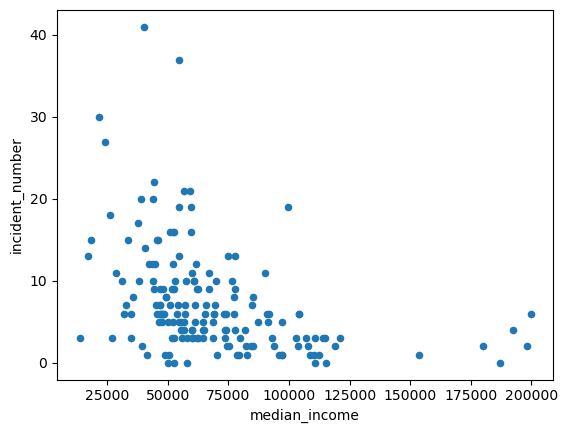

In [24]:
full_counts.plot(x = 'median_income', y = 'incident_number', kind = 'scatter');

In [25]:
burglary_summary = (
    full_counts
    .assign(group = pd.qcut(full_counts['median_income'],
                            q = 10,
                           duplicates = 'drop'))
    .groupby('group')
    [['median_income', 'incident_number']]
    .mean()
    .reset_index()
)

burglary_summary

,group,median_income,incident_number
0,"(13749.999, 38951.1]",28729.058824,11.882353
1,"(38951.1, 46749.6]",43338.411765,13.117647
2,"(46749.6, 51028.9]",48479.352941,6.235294
3,"(51028.9, 55249.6]",53071.941176,10.411765
4,"(55249.6, 60072.0]",57604.647059,8.000000
5,"(60072.0, 65577.8]",62374.411765,6.294118
6,"(65577.8, 74996.2]",70782.705882,6.058824
7,"(74996.2, 85752.0]",80240.058824,4.882353
8,"(85752.0, 107205.6]",96926.941176,5.000000
9,"(107205.6, 199643.0]",138605.058824,2.000000


7. Fit a Poisson regression model with target variable the rate of burglaries per census tract and with predictor the median income. Offset using the log of the population so that we are looking at the rate of burglaries per population instead of the number of burglaries. How can you interpret the meaning of the output?

In [28]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import poisson
from ipywidgets import interact, FloatSlider, IntSlider
from scipy.stats import chi2
import numpy as np

In [36]:
pr_burglary = smf.glm('incident_number ~ median_income',
                      data = full_counts,
                      offset = np.log(full_counts['population']/1000),
                      family = sm.families.Poisson()).fit()

pr_burglary.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        incident_number   No. Observations:                  170
Model:                            GLM   Df Residuals:                      168
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -694.61
Date:                Sat, 22 Oct 2022   Deviance:                       800.18
Time:                        13:14:55   Pearson chi2:                 1.22e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.7578
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.7565      0.081     21.759      0.000       1.598       1.915
median_income -1.866e-05   1.33e-06    -14.029      0.000   -2.13e-05   -1.61e-05
=================================================================================
"""

This can be interpreted to mean:   
    aggravated burglaries per 1000 residents = e ^ (1.7565 + -0.00001866(median_income))   
    aggravated burglaries per 1000 residents = 5.792 * e ^ (-0.00001866(median_income))
    
 Broadly, this indicates that as for every $1000 increase in median income, the aggravated burglary rate decreases by 1.85%
 
 

In [39]:
burglary_summary = (
    full_counts
    .assign(group = pd.qcut(full_counts['median_income'],
                            q = 10,
                           duplicates = 'drop'))
    .groupby('group')
    [['median_income', 'burglaries_rate']]
    .mean()
    .reset_index()
)

burglary_summary['fitted'] = pr_burglary.predict(burglary_summary)

burglary_summary

,group,median_income,burglaries_rate,fitted
0,"(13749.999, 38951.1]",28729.058824,4.043676,3.388112
1,"(38951.1, 46749.6]",43338.411765,4.318552,2.579510
2,"(46749.6, 51028.9]",48479.352941,1.364659,2.343505
3,"(51028.9, 55249.6]",53071.941176,3.089588,2.150994
4,"(55249.6, 60072.0]",57604.647059,2.322530,1.976505
5,"(60072.0, 65577.8]",62374.411765,1.697500,1.808153
6,"(65577.8, 74996.2]",70782.705882,1.680802,1.545537
7,"(74996.2, 85752.0]",80240.058824,1.109806,1.295448
8,"(85752.0, 107205.6]",96926.941176,1.104103,0.948767
9,"(107205.6, 199643.0]",138605.058824,0.614862,0.435838


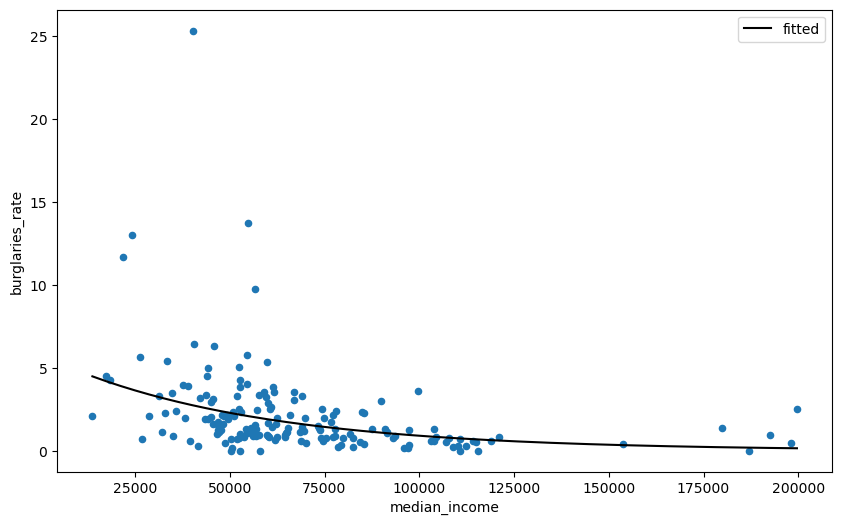

In [38]:
fit_df = pd.DataFrame({
    'median_income': np.linspace(start = full_counts['median_income'].min(),
                                 stop = full_counts['median_income'].max(),
                                 num = 150)
})
fit_df['fitted'] = pr_burglary.predict(fit_df)

ax = full_counts.plot(x = 'median_income', y = 'burglaries_rate', kind = 'scatter', figsize = (10,6))

fit_df.plot(x = 'median_income', y = 'fitted', color = 'black', ax = ax);

In [42]:
@interact(median_income = IntSlider(value = 75000, min = full_counts['median_income'].min(), max = full_counts['median_income'].max()))
def fit_plot(median_income):
    
    mu = np.exp(pr_burglary.params['Intercept'] + median_income * pr_burglary.params['median_income'])
    x = np.arange(start = 0, stop = 25, step = 1)
    y = poisson.pmf(x, mu = mu)

    plt.figure(figsize = (10,5))
    plt.bar(x, y, edgecolor = 'black')
    plt.xticks(x)
    plt.xlabel('Number of Burglaries per 1000 residents')
    plt.ylabel('Probability')
    plt.title(f'Estimated Distribution of Number of Burglaries\nmedian_income = {median_income}\n$\mu$={round(mu, 3)}');

interactive(children=(IntSlider(value=75000, description='median_income', max=199643, min=13750), Output()), _…

8. **Bonus:** Try out a negative binomial model. To get started with a negative binomial model, you can check out [this tutorial](https://timeseriesreasoning.com/contents/negative-binomial-regression-model/). How does this model compare to the Poisson model?